# Carte Carrington

- synoptic map https://cesam.lam.fr/lascomission/Lascomission/synoptic_and_carrington_maps.html

In [1]:
import os
from module import carrington
import matplotlib.pyplot as plt

In [2]:
folder = 'carrington_test_data/'

carrington_list = []
for filename in os.listdir(folder):
    carrington_list.append(carrington(folder + filename))

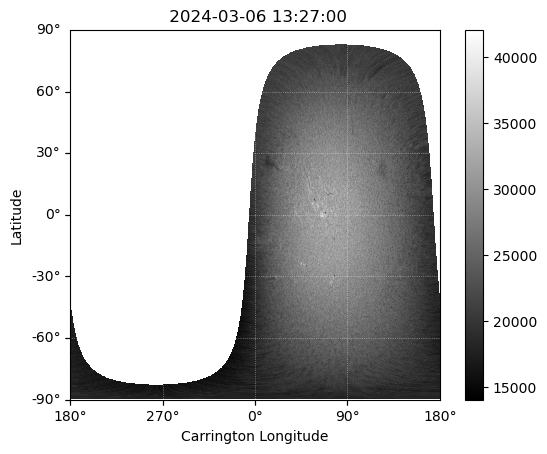

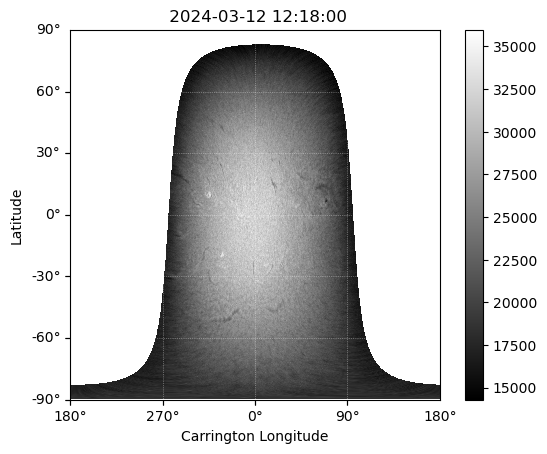

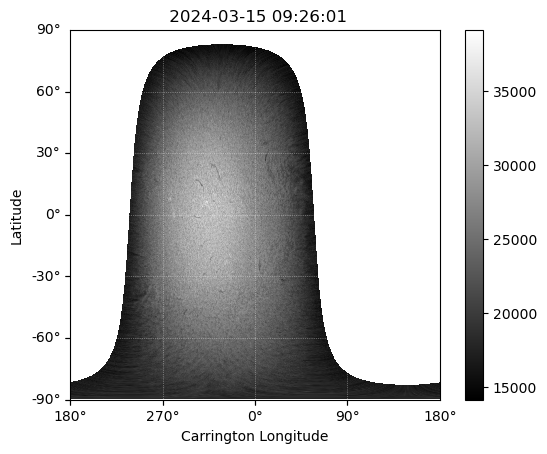

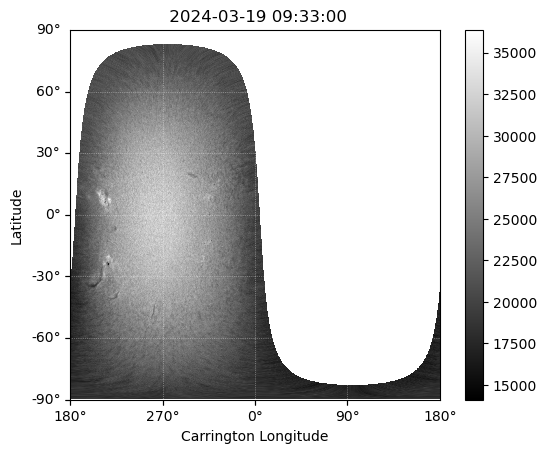

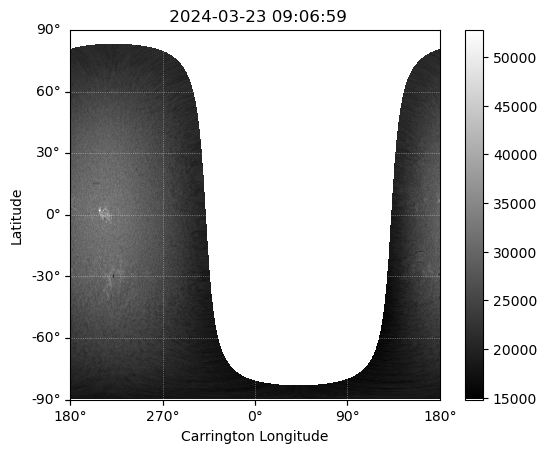

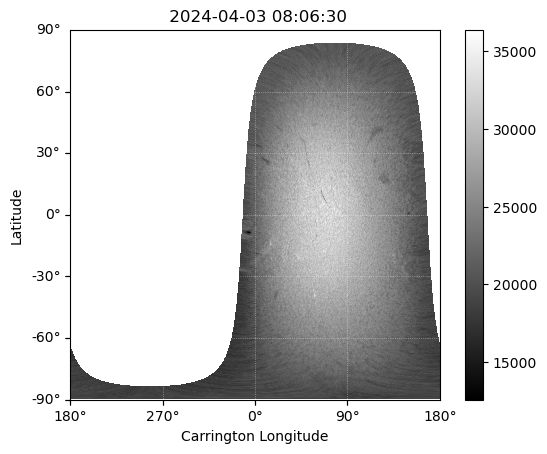

In [3]:
for carr in carrington_list:
    fig = plt.figure()
    ax = fig.add_subplot(projection=carr)
    im = carr.plot(axes=ax)
    plt.colorbar(im, ax=ax)

In [4]:
for carr in carrington_list:
    print((carr.carrington_longitude.deg))

84.07065915662386
5.642339810448644
327.67840036615576
274.8872296699337
222.38621551270396
77.84692032650739


In [5]:
carrington_list.sort(key=lambda x: x.carrington_longitude.deg)

In [6]:
carr_longs = []
for carr in carrington_list:
    idx = int((carr.carrington_longitude.deg)*carr.data.shape[1]/360)
    carr_longs.append(idx)
    print(idx)

32
442
478
1265
1563
1864


In [7]:
import numpy as np

img = np.full(carrington_list[0].data.shape, np.nan)
for idx in range(0,len(carrington_list)):    
    if idx==0:
        start_index = int(np.floor(carr_longs[0] - (2048-carr_longs[-1]+carr_longs[0])/2))
    else:
        start_index = end_index

    if idx==len(carrington_list)-1:
        end_index = int(np.ceil(carr_longs[0] - (2048-carr_longs[-1]+carr_longs[0])/2))
    else:
        end_index = int(np.ceil((carr_longs[idx]+carr_longs[idx+1])/2))
    
    print(start_index)
    print(end_index)
    
    if  start_index < 0 :
        img[:,start_index+2048:] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,start_index+2048:]
        img[:,:end_index] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,:end_index]
    else:  
        img[:,start_index:end_index] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,start_index:end_index]

img = np.roll(img, 1024, axis = 1)

-76
237
237
460
460
872
872
1414
1414
1714
1714
-76


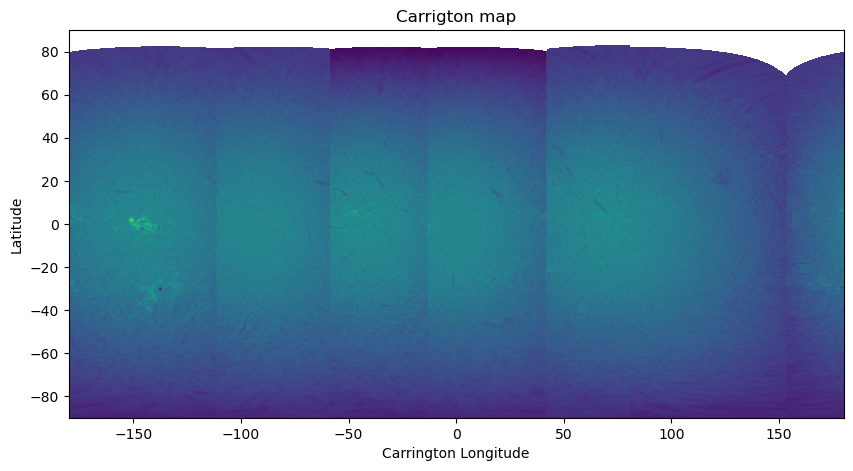

In [8]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, origin='lower', extent=[-180,180,-90,90])
 
plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');

plt.title('Carrigton map');

